1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)

In [3]:
import pandas as pd
path="/content/drive/MyDrive/DS With Generative AI/Machine Learning/BIKE DETAILS.csv"
df = pd.read_csv(path)

print('First 10 rows:')
print(df.head(10))

print('\nShape of the DataFrame:')
print(df.shape)

print('\nColumn information:')
print(df.info())

First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

2. Check for missing values in all columns and describe your approach for
handling them.

In [5]:
import pandas as pd
df = pd.read_csv(path)
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


3. Plot the distribution of selling prices using a histogram and describe the
overall trend.


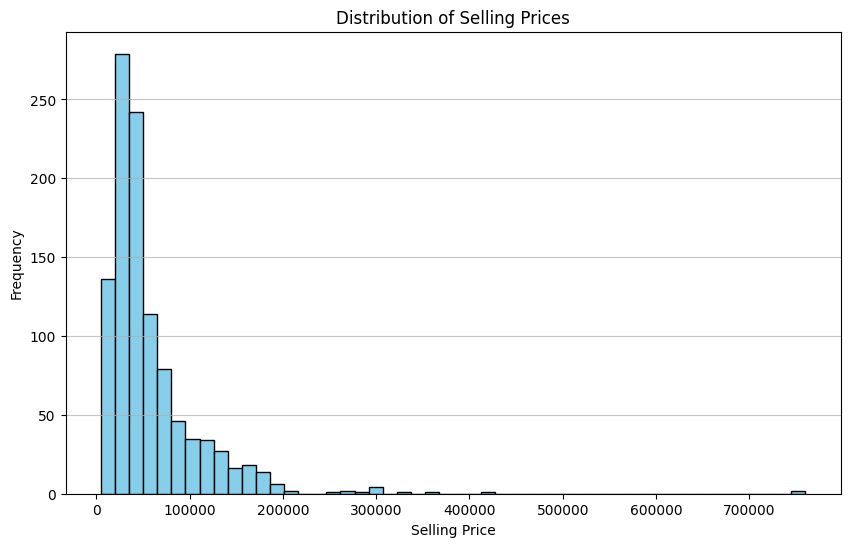

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(path)

plt.figure(figsize=(10, 6))
plt.hist(df['selling_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.savefig('selling_price_distribution.png')

4. Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

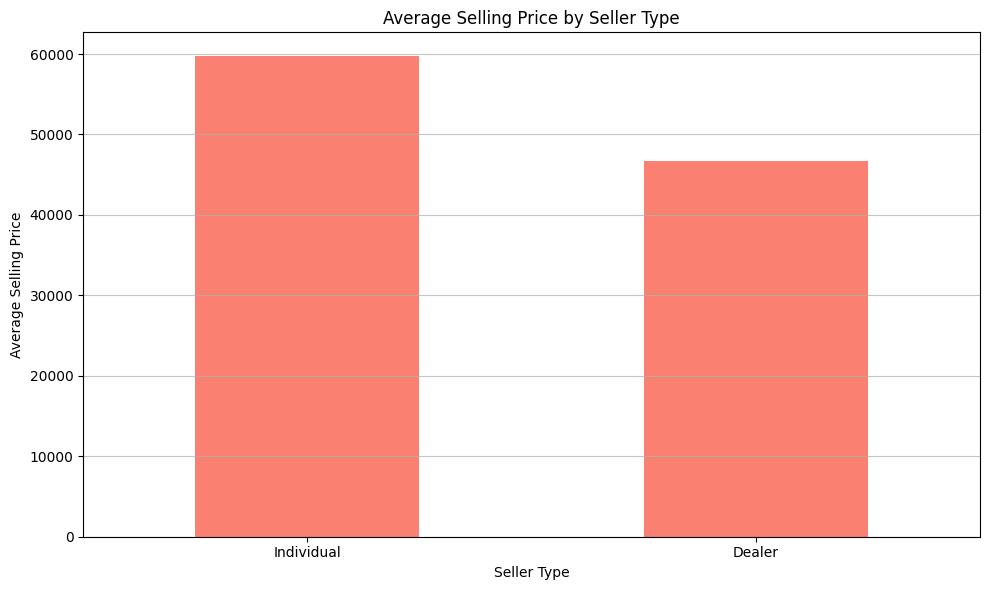

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(path)
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_seller.plot(kind='bar', color='salmon')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


In [8]:
import pandas as pd
df = pd.read_csv(path)
print('First 10 rows:')
print(df.head(10))
print('\nShape of the DataFrame:')
print(df.shape)
print('\nColumn information:')
print(df.info())

First 10 rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [9]:
import pandas as pd

df = pd.read_csv(path)

print("### Summary Statistics for `km_driven` (Before Outlier Removal)")
print(df['km_driven'].describe())
print("\n" + "="*50 + "\n")

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}\n")

df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("### Summary Statistics for `km_driven` (After Outlier Removal)")
print(df_cleaned['km_driven'].describe())
print("\n" + "="*50 + "\n")

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_cleaned)}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

### Summary Statistics for `km_driven` (Before Outlier Removal)
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


Q1 (25th percentile): 13500.0
Q3 (75th percentile): 43000.0
IQR: 29500.0
Lower Bound: -30750.0
Upper Bound: 87250.0

### Summary Statistics for `km_driven` (After Outlier Removal)
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Original number of rows: 1061
Number of rows after removing outliers: 1022
Number of outliers removed: 39


7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

Scatter plot of 'year' vs. 'selling_price' created successfully.


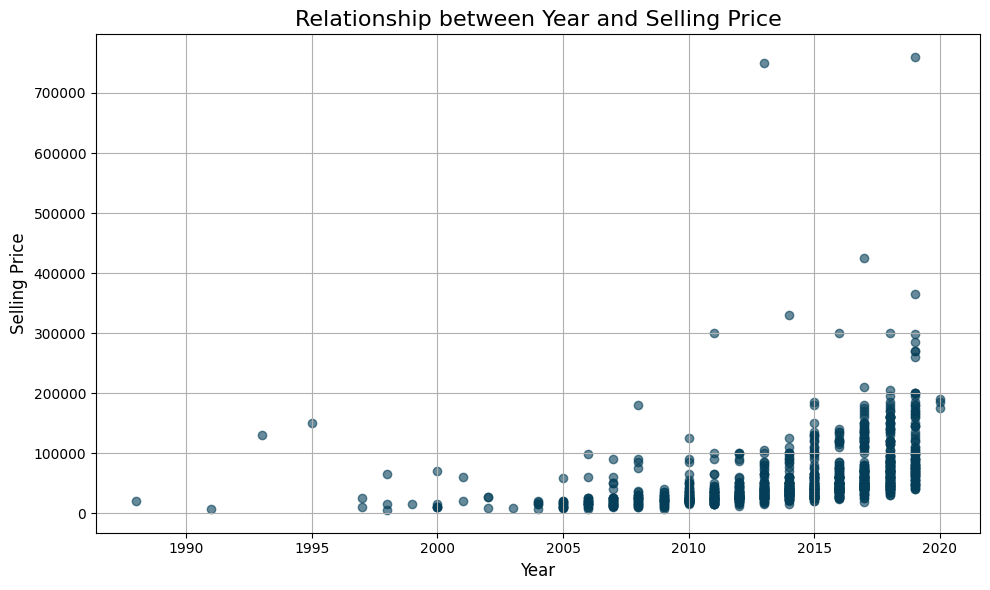

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path)

plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='#043E58')
plt.title('Relationship between Year and Selling Price', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('year_vs_selling_price_scatter.png')

print("Scatter plot of 'year' vs. 'selling_price' created successfully.")

8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [11]:
import pandas as pd

df = pd.read_csv(path)

df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')

print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

First 5 rows of the DataFrame after one-hot encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

Correlation Matrix:
                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


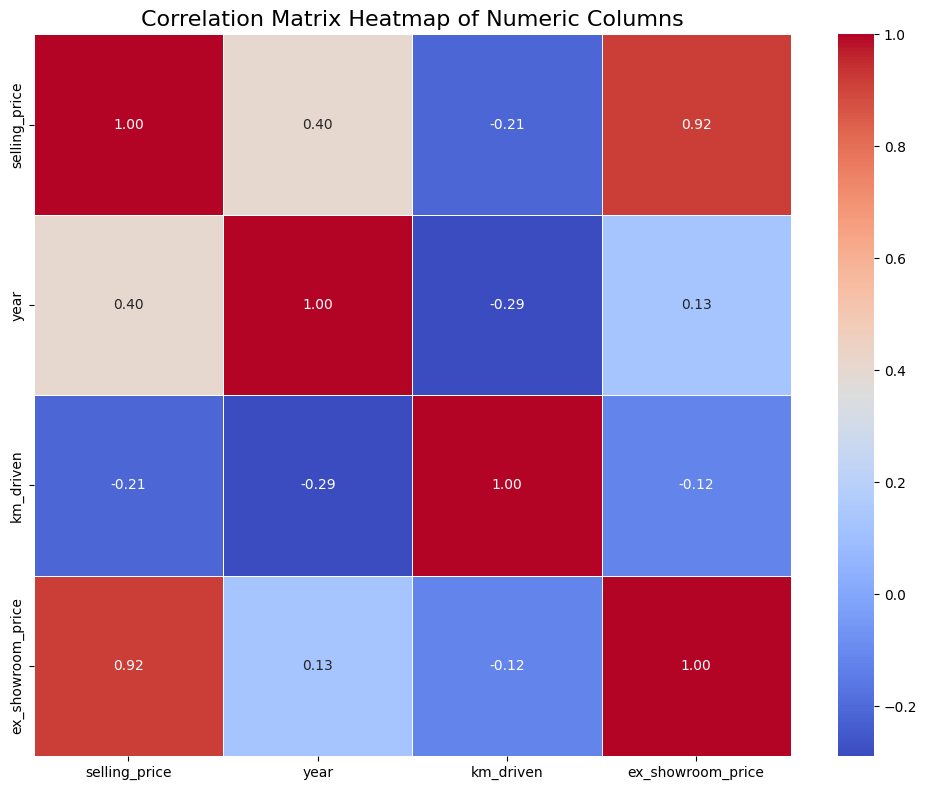

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(path)

numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numeric Columns', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

print("Correlation Matrix:")
print(corr_matrix)

10. Summarize your findings in a brief report:
    - What are the most important factors affecting a bike's selling price?
    - Mention any data cleaning or feature engineering you performed.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(path)

print("### Summary Statistics for `km_driven` (Before Outlier Removal)")
print(df['km_driven'].describe())
print("\n" + "="*50 + "\n")

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("### Summary Statistics for `km_driven` (After Outlier Removal)")
print(df_cleaned['km_driven'].describe())
print("\n" + "="*50 + "\n")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')
print("\n### First 5 rows after One-Hot Encoding:")
print(df_encoded.head())
print("\n" + "="*50 + "\n")

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
print("\n### Correlation Matrix:")
print(corr_matrix)

### Summary Statistics for `km_driven` (Before Outlier Removal)
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


### Summary Statistics for `km_driven` (After Outlier Removal)
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Number of outliers removed: 39

### First 5 rows after One-Hot Encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4 